<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/C%C3%B3pia_de_copia_ciclos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

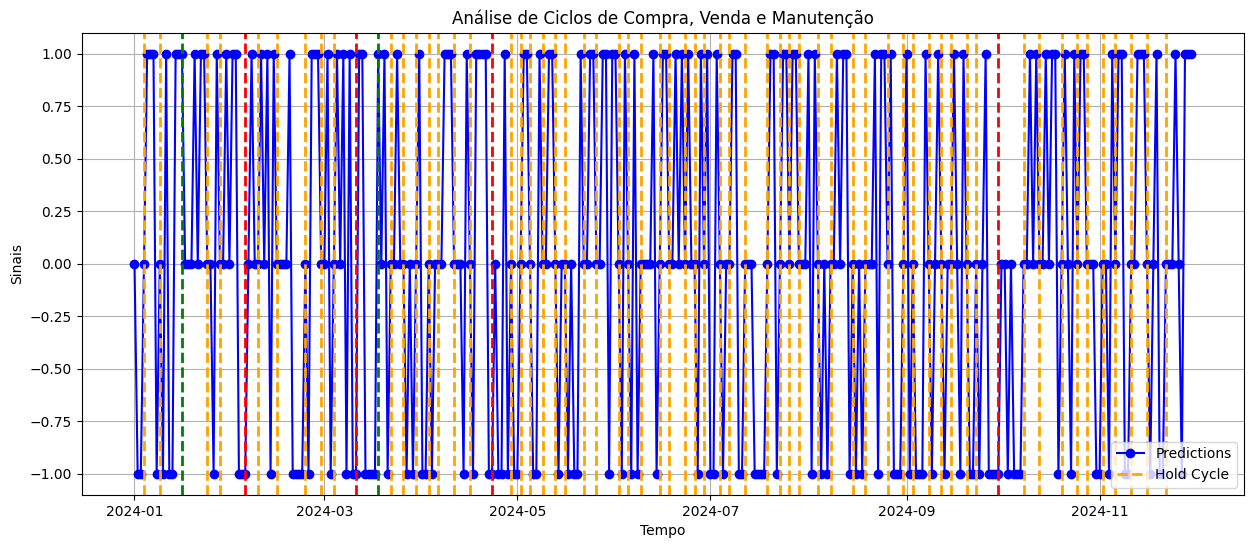

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


dates = np.arange('2024-01', '2024-12', dtype='datetime64[D]')
predictions = np.random.choice([1, 0, -1], size=len(dates), p=[0.3, 0.4, 0.3])


def analyze_cycles(predictions):
    cycle_start = None
    patterns = []
    for i in range(len(predictions)):
        if predictions[i] == 1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append((i, 'Up Cycle'))
                cycle_start = None
        elif predictions[i] == -1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append((i, 'Down Cycle'))
                cycle_start = None
        else:
            if cycle_start is not None and i - cycle_start >= 2:
                patterns.append((i, 'Hold Cycle'))
                cycle_start = None
    return patterns


patterns = analyze_cycles(predictions)


plt.figure(figsize=(15, 6))
plt.plot(dates, predictions, marker='o', linestyle='-', color='blue', label='Predictions')


for idx, cycle in patterns:
    if cycle == 'Up Cycle':
        plt.axvline(x=dates[idx], color='green', linestyle='--', linewidth=2, label='Up Cycle' if idx == patterns[0][0] else "")
    elif cycle == 'Down Cycle':
        plt.axvline(x=dates[idx], color='red', linestyle='--', linewidth=2, label='Down Cycle' if idx == patterns[0][0] else "")
    elif cycle == 'Hold Cycle':
        plt.axvline(x=dates[idx], color='orange', linestyle='--', linewidth=2, label='Hold Cycle' if idx == patterns[0][0] else "")


plt.xlabel('Tempo')
plt.ylabel('Sinais')
plt.title('Análise de Ciclos de Compra, Venda e Manutenção')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()



Análise de Padrões de Ciclos:

Padrões de Ciclos Encontrados:
('Hold Cycle',): 188 ocorrências
('Hold Cycle', 'Hold Cycle'): 187 ocorrências
('Hold Cycle', 'Hold Cycle', 'Hold Cycle'): 186 ocorrências
('Hold Cycle', 'Hold Cycle', 'Hold Cycle', 'Hold Cycle'): 185 ocorrências


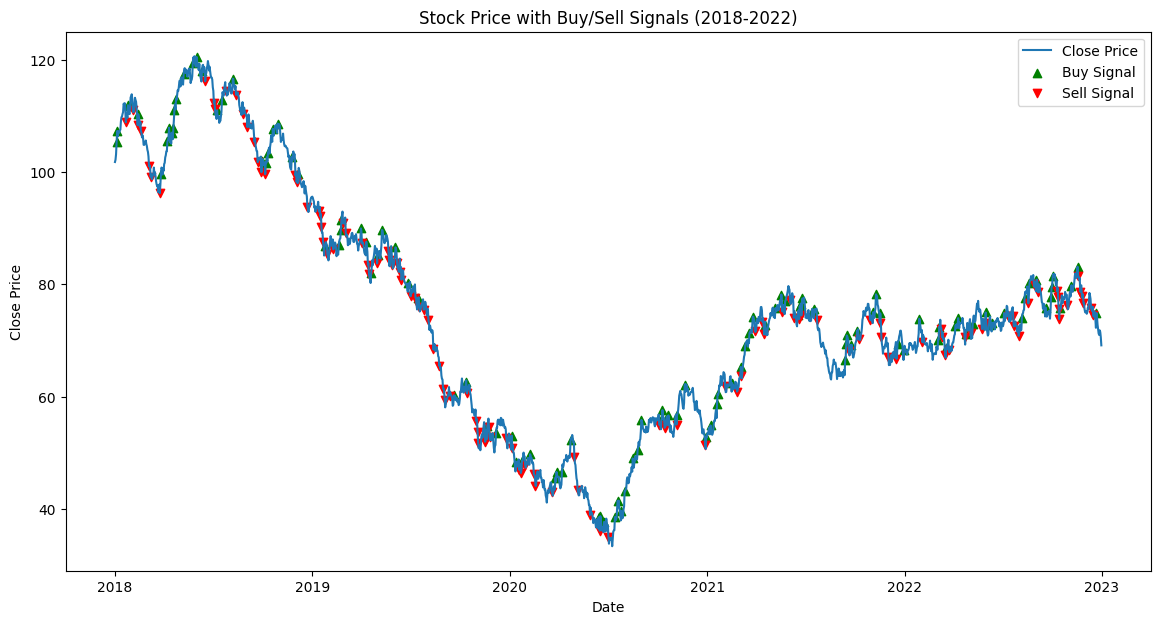

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criando dados fictícios para o exemplo
dates = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')
np.random.seed(0)
close_prices = np.cumsum(np.random.randn(len(dates))) + 100

# Criar DataFrame
data = pd.DataFrame({'date': dates, 'close': close_prices})

# Filtrar os dados para o período de 2018 a 2022
data_filtered = data[(data['date'] >= '2018-01-01') & (data['date'] <= '2022-12-31')]
data_filtered.reset_index(drop=True, inplace=True)

# Funções para cálculo da derivada e variância da derivada
def calculate_derivative(data):
    return np.diff(data)

def calculate_variance_of_derivative(data):
    derivative = calculate_derivative(data)
    return np.var(derivative)

data_filtered['derivative'] = np.append([0], calculate_derivative(data_filtered['close'].values))
data_filtered['variance_derivative'] = calculate_variance_of_derivative(data_filtered['close'].values)

# Função para gerar sinais de compra e venda
def generate_signals_based_on_derivative(data, threshold):
    derivative = calculate_derivative(data)
    buy_signals = (derivative > threshold).astype(int)
    sell_signals = (derivative < -threshold).astype(int) * -1
    return buy_signals, sell_signals

threshold = 1.5  # Define um limite arbitrário para gerar sinais
buy_signals, sell_signals = generate_signals_based_on_derivative(data_filtered['close'].values, threshold)

data_filtered['buy_signals'] = np.append([0], buy_signals)
data_filtered['sell_signals'] = np.append([0], sell_signals)

# Função para gerar previsões com base nos sinais de compra e venda
def generate_predictions_metric(buy_signals, sell_signals):
    predictions = np.zeros(len(buy_signals))
    predictions[buy_signals == 1] = 1  # Predição de compra
    predictions[sell_signals == -1] = -1  # Predição de venda
    return predictions

predictions = generate_predictions_metric(data_filtered['buy_signals'], data_filtered['sell_signals'])

# Função para analisar ciclos
def analyze_cycles(predictions):
    cycle_start = None
    patterns = []

    for i in range(len(predictions)):
        if predictions[i] == 1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Up Cycle')
                cycle_start = None
        elif predictions[i] == -1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Down Cycle')
                cycle_start = None
        else:
            if cycle_start is not None and i - cycle_start >= 2:
                patterns.append('Hold Cycle')
                cycle_start = None

    return patterns

patterns = analyze_cycles(predictions)

# Função para contar padrões de ciclos
def count_cycle_patterns(patterns, max_pattern_length):
    pattern_counts = {}

    for length in range(1, max_pattern_length + 1):
        for i in range(len(patterns) - length + 1):
            pattern = tuple(patterns[i:i+length])
            if pattern in pattern_counts:
                pattern_counts[pattern] += 1
            else:
                pattern_counts[pattern] = 1

    return pattern_counts

max_pattern_length = 4
pattern_counts = count_cycle_patterns(patterns, max_pattern_length)

# Função para imprimir os padrões de ciclos
def print_cycle_patterns(pattern_counts):
    print("\nPadrões de Ciclos Encontrados:")
    for pattern, count in pattern_counts.items():
        print(f"{pattern}: {count} ocorrências")

print("\nAnálise de Padrões de Ciclos:")
print_cycle_patterns(pattern_counts)

# Plotagem dos dados e dos resultados
plt.figure(figsize=(14, 7))
plt.plot(data_filtered['date'], data_filtered['close'], label='Close Price')
plt.scatter(data_filtered['date'][data_filtered['buy_signals'] == 1],
            data_filtered['close'][data_filtered['buy_signals'] == 1],
            label='Buy Signal', marker='^', color='g')
plt.scatter(data_filtered['date'][data_filtered['sell_signals'] == -1],
            data_filtered['close'][data_filtered['sell_signals'] == -1],
            label='Sell Signal', marker='v', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price with Buy/Sell Signals (2018-2022)')
plt.legend()
plt.show()
